In [318]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
pd.set_option('precision', 3)

# Data Visualisation Libraries
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

!pip install seaborn --upgrade
import seaborn as sns
sns.set_style('darkgrid')

# Statistics
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import learning_curve

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [319]:
travel_data_df = pd.read_csv('/content/drive/MyDrive/MIT/Hackathon/Traveldata_train_(1).csv')
display(travel_data_df.head())
display(travel_data_df.info())
display(travel_data_df.describe())

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


None

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,9.438e+04,94346.000,94379.000,94322.000,94022.000
mean,9.885e+07,39.420,1978.888,14.647,15.005
std,2.725e+04,15.117,1027.961,38.139,38.439
min,9.880e+07,7.000,50.000,0.000,0.000
25%,9.882e+07,27.000,1359.000,0.000,0.000
50%,9.885e+07,40.000,1923.000,0.000,0.000
75%,9.887e+07,51.000,2538.000,12.000,13.000
max,9.889e+07,85.000,6951.000,1592.000,1584.000


In [320]:
survey_data_df = pd.read_csv('/content/drive/MyDrive/MIT/Hackathon/Surveydata_train_(1).csv')
display(survey_data_df.head())
display(survey_data_df.info())
display(survey_data_df.describe())

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

None

,ID,Overall_Experience
count,9.438e+04,94379.000
mean,9.885e+07,0.547
std,2.725e+04,0.498
min,9.880e+07,0.000
25%,9.882e+07,0.000
50%,9.885e+07,1.000
75%,9.887e+07,1.000
max,9.889e+07,1.000


In [321]:
#finding the missing values in travel_df
travel_data_df.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [322]:
#finding the missing values in survey_df
survey_data_df.isnull().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [323]:
df_list = [survey_data_df, travel_data_df]
merged_df = pd.merge(travel_data_df, survey_data_df, how='inner', on=['ID'])

pd.set_option('display.max_columns', None)

display(merged_df.head())
display(merged_df.info())

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

None

In [324]:
merged_df.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [325]:
len(merged_df.ID.unique())

94379

In [326]:
bad_rating_df = merged_df[merged_df["Overall_Experience"] == 1]
bad_rating_df.count()

ID                         51593
Gender                     51555
Customer_Type              46765
Age                        51576
Type_Travel                46553
Travel_Class               51593
Travel_Distance            51593
Departure_Delay_in_Mins    51560
Arrival_Delay_in_Mins      51402
Overall_Experience         51593
Seat_Comfort               51561
Seat_Class                 51593
Arrival_Time_Convenient    46655
Catering                   46799
Platform_Location          51576
Onboard_Wifi_Service       51576
Onboard_Entertainment      51583
Online_Support             51533
Ease_of_Online_Booking     51543
Onboard_Service            47437
Legroom                    51539
Baggage_Handling           51515
CheckIn_Service            51550
Cleanliness                51587
Online_Boarding            51587
dtype: int64

In [327]:
train_df = merged_df.copy()

In [328]:
encoding_dict = {1: "Yes", 0 : "No"}

train_df['Overall_Experience'] = train_df['Overall_Experience'].map(encoding_dict)
train_df['Overall_Experience'].unique()


array(['No', 'Yes'], dtype=object)

In [329]:
train_df.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,No,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,No,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,Yes,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,No,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,Yes,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [330]:
train_df.shape[0]

94379

In [331]:
colors = ['#00A5E0', '#DD403A']
font_size = 20

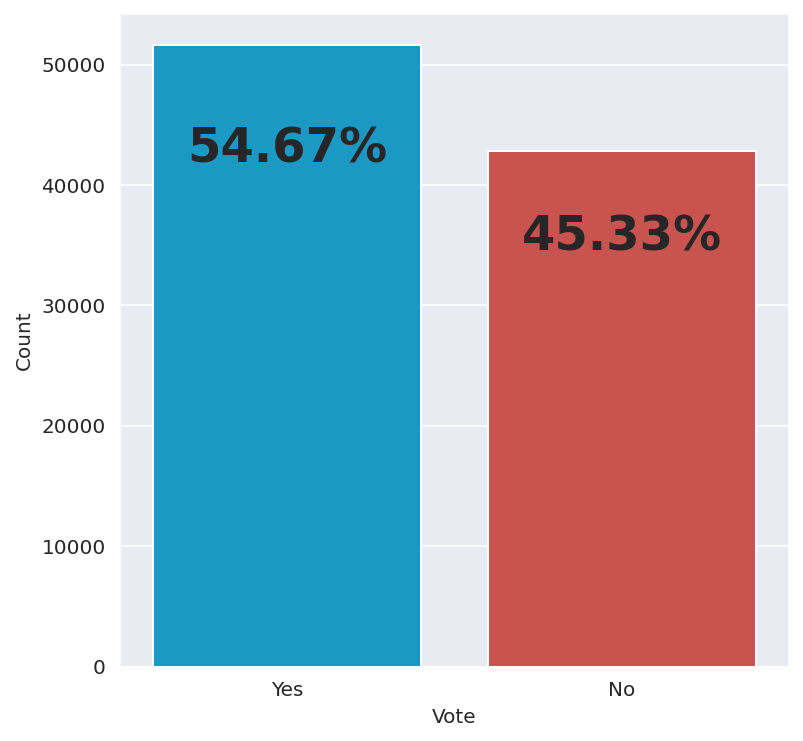

In [332]:
fig, ax = plt.subplots(figsize=(6, 6))

experience_count_dict = dict(train_df['Overall_Experience'].value_counts())

x = list(experience_count_dict.keys())
y = list(experience_count_dict.values())
#percentage = [10, 30]
ax = sns.barplot(x=x, y=y, palette=colors)
patches = ax.patches
i = 0
for x, y in experience_count_dict.items():
   x_1 = patches[i].get_x() + patches[i].get_width() / 2
   y_1 = patches[i].get_height() - ( patches[i].get_height() / 6 )
   ax.annotate('{:.2f}%'.format((y/train_df.shape[0]) * 100), (x_1, y_1), ha='center', va='center', fontweight='bold',
                size=font_size + 4)
   i = i + 1

ax.set_xticklabels(['Yes', 'No'])
ax.set_xlabel('Vote')
ax.set_ylabel('Count')

plt.show()

In [333]:
all_columns = train_df.columns.values.tolist()
continuous = ['Age', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins', 'Travel_Distance']
categorical = list(set(all_columns) - set(continuous) - set(["ID", "Overall_Experience"]))

#categorical = ['Gender', 'Seat_Comfort', 'Arrival_Time_Convenient', 'Baggage_Handling', 'Cleanliness', 'Legroom']

print('Continuous: ', ', '.join(continuous))
print('Categorical: ', ', '.join(categorical))

Continuous:  Age, Departure_Delay_in_Mins, Arrival_Delay_in_Mins, Travel_Distance
Categorical:  Platform_Location, Cleanliness, Onboard_Entertainment, Customer_Type, Arrival_Time_Convenient, Catering, Online_Boarding, Baggage_Handling, Legroom, Travel_Class, Seat_Class, Ease_of_Online_Booking, Online_Support, Onboard_Wifi_Service, CheckIn_Service, Type_Travel, Onboard_Service, Gender, Seat_Comfort


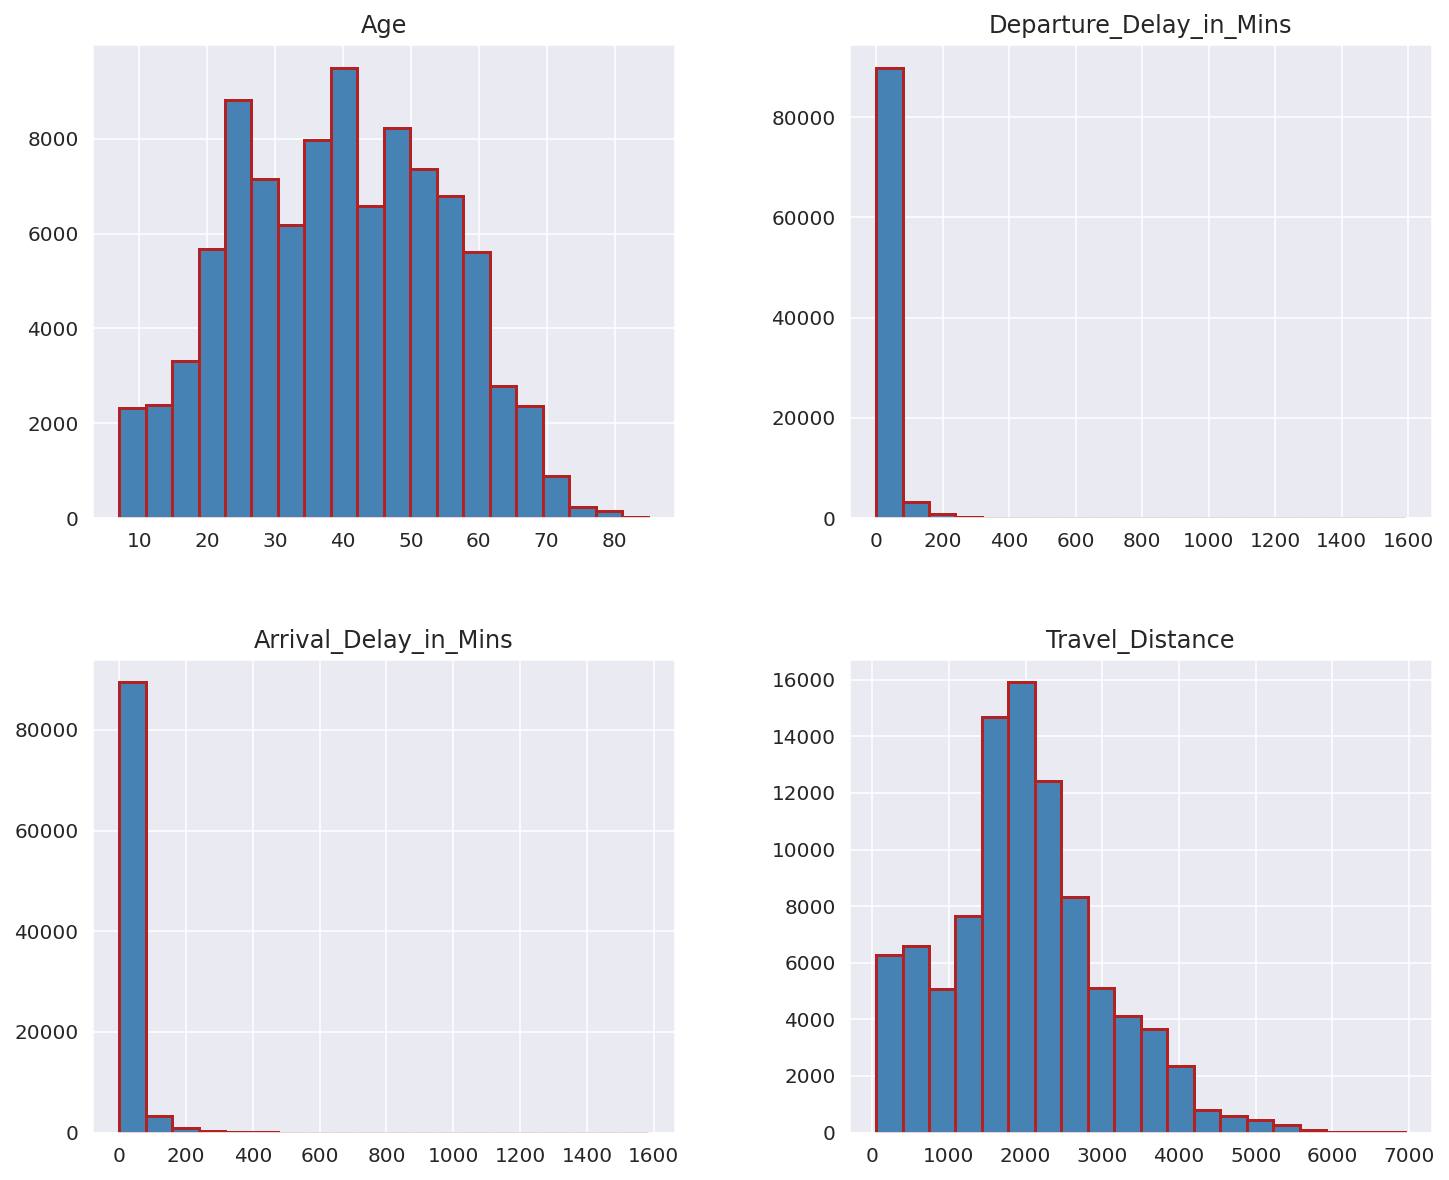

In [334]:
train_df[continuous].hist(figsize=(12, 10),
                          bins=20,
                          layout=(2, 2),
                          color='steelblue',
                          edgecolor='firebrick',
                          linewidth=1.5);

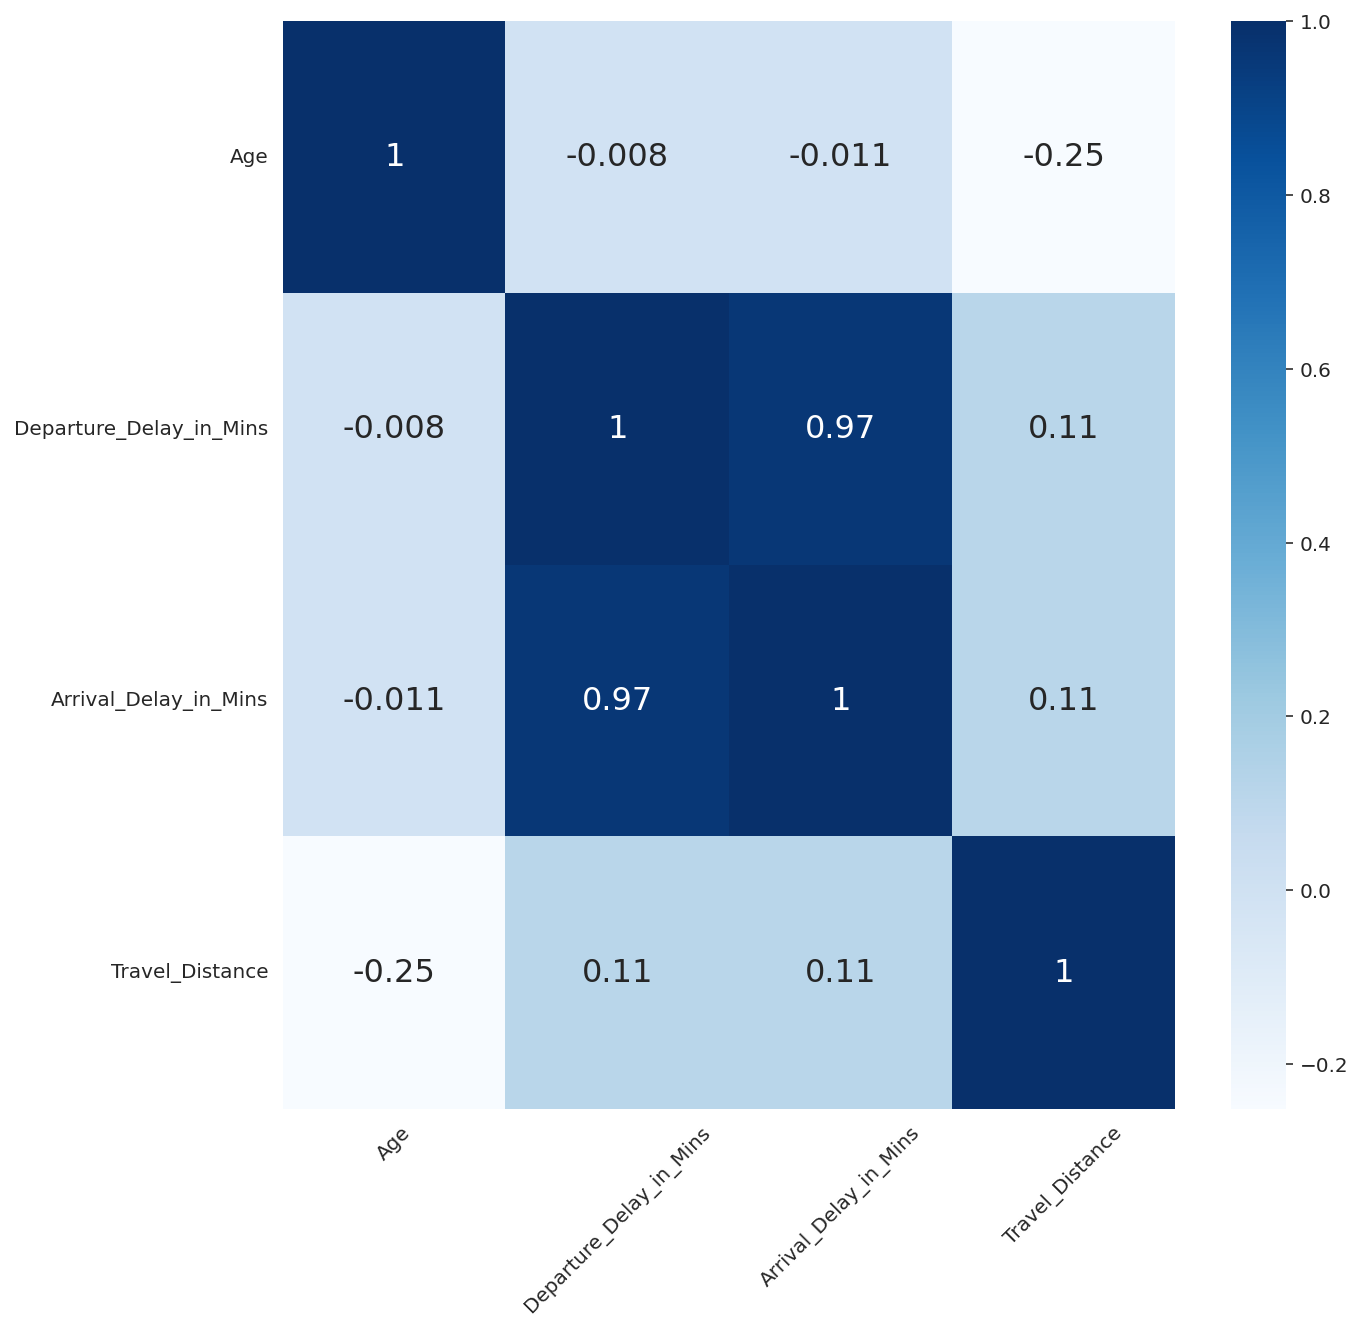

In [335]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(train_df[continuous].corr(),
            annot=True,
            annot_kws={'fontsize': 16},
            cmap='Blues',
            ax=ax)

ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=360);

Arrival delya and departure delay are too correlated. Hence we consider only 1.

In [336]:
def plot_continuous(feature):
    df_func = train_df.copy()
    df_func['Overall_Experience'] = df_func['Overall_Experience'].astype('category')

    fig, (ax1, ax2) = plt.subplots(2,
                                   figsize=(9, 7),
                                   sharex=True,
                                   gridspec_kw={'height_ratios': (.7, .3)})

    for df, color, label in zip([df_yes, df_no], colors, ['Yes', 'No']):
        sns.histplot(data=df,
                     x=feature,
                     bins=15,
                     color=color,
                     alpha=0.66,
                     edgecolor='firebrick',
                     label=label,
                     kde=False,
                     ax=ax1)
    ax1.legend()

    sns.boxplot(x=feature, y='Overall_Experience', data=df_func, palette=colors, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_yticklabels(['Yes', 'No'])

    plt.tight_layout();


commeting for faster run but was used for data preprocessing and feature selection

In [337]:
# df_yes = train_df[train_df['Overall_Experience'] == "Yes"]
# df_no = train_df[train_df['Overall_Experience'] == "No"]

# for item in continuous:
#   plot_continuous(item)


In [338]:
# df_cat = train_df[categorical]

# fig, ax = plt.subplots(5, 5, figsize=(200, 75))

# for index, column in enumerate(df_cat.columns):

#     plt.subplot(5, 5, index + 1)
#     sns.countplot(x=column, data=train_df, palette="tab10")

#     plt.ylabel('Count')


# plt.tight_layout();

In [339]:
def plot_categorical(feature):
    '''For a categorical feature, plot a seaborn.countplot for the total counts of each category next to a barplot for the churn rate.'''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    sns.countplot(x=feature,
                  hue='Overall_Experience',
                  data=train_df,
                  palette=colors,
                  ax=ax1)
    ax1.set_ylabel('Count')
    ax1.legend(labels=['Retained', 'Churned'])

    sns.barplot(x=feature,
                y='Overall_Experience',
                data=train_df,
                palette=colors_cat,
                ax=ax2)
    ax2.set_ylabel('Churn rate')

    plt.tight_layout();


In [340]:
display(train_df.head())

encoding_dict = {"Yes": 1, "No" : 0}
train_df['Overall_Experience'] = train_df['Overall_Experience'].map(encoding_dict)


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,No,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,No,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,Yes,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,No,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,Yes,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [341]:
display(train_df.head())

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [342]:
# colors_cat = ['#E8907E', '#D5CABD', '#7A6F86', '#C34A36', '#B0A8B9', '#845EC2', '#8f9aaa', '#FFB86F', '#63BAAA', '#9D88B3', '#38c4e3']
# plot_categorical('Gender')


In [343]:
# for item in categorical:
#   plot_categorical(item)


Travel type, seat class, arrival convinient, deaprrture time (based on correlation matrix) can be dropped.

In [344]:
train_df = train_df.drop(['Type_Travel', "Seat_Class", "Arrival_Time_Convenient", "Departure_Delay_in_Mins"], axis=1)

In [345]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94379 non-null  int64  
 1   Gender                  94302 non-null  object 
 2   Customer_Type           85428 non-null  object 
 3   Age                     94346 non-null  float64
 4   Travel_Class            94379 non-null  object 
 5   Travel_Distance         94379 non-null  int64  
 6   Arrival_Delay_in_Mins   94022 non-null  float64
 7   Overall_Experience      94379 non-null  int64  
 8   Seat_Comfort            94318 non-null  object 
 9   Catering                85638 non-null  object 
 10  Platform_Location       94349 non-null  object 
 11  Onboard_Wifi_Service    94349 non-null  object 
 12  Onboard_Entertainment   94361 non-null  object 
 13  Online_Support          94288 non-null  object 
 14  Ease_of_Online_Booking  94306 non-null

In [346]:
display(train_df.head())

,ID,Gender,Customer_Type,Age,Travel_Class,Travel_Distance,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,Business,272,5.0,0,Needs Improvement,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Eco,2200,0.0,0,Poor,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business,1061,119.0,1,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business,780,18.0,0,Acceptable,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business,1981,0.0,1,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [347]:
for item in categorical:
  if item in train_df:
    print(item, train_df[item].explode().unique())

Platform_Location ['Very Convenient' 'Needs Improvement' 'Manageable' 'Inconvenient'
 'Convenient' nan 'Very Inconvenient']
Cleanliness ['Needs Improvement' 'Good' 'Excellent' 'Acceptable' 'Poor'
 'Extremely Poor' nan]
Onboard_Entertainment ['Needs Improvement' 'Poor' 'Good' 'Excellent' 'Acceptable'
 'Extremely Poor' nan]
Customer_Type ['Loyal Customer' 'Disloyal Customer' nan]
Catering ['Excellent' 'Poor' 'Needs Improvement' nan 'Acceptable' 'Good'
 'Extremely Poor']
Online_Boarding ['Poor' 'Good' 'Excellent' 'Acceptable' 'Needs Improvement' nan
 'Extremely Poor']
Baggage_Handling ['Needs Improvement' 'Poor' 'Excellent' 'Acceptable' 'Good' nan]
Legroom ['Acceptable' 'Needs Improvement' 'Excellent' 'Good' 'Poor'
 'Extremely Poor' nan]
Travel_Class ['Business' 'Eco']
Ease_of_Online_Booking ['Needs Improvement' 'Good' 'Excellent' 'Acceptable' 'Poor' nan
 'Extremely Poor']
Online_Support ['Acceptable' 'Good' 'Excellent' 'Poor' nan 'Needs Improvement'
 'Extremely Poor']
Onboard_Wifi_Servic

In [348]:
# this is done above to plot graphs as it needs numeric
# encoding_dict = {"Yes": 1, "No" : 0}
# train_df['Overall_Experience'] = train_df['Overall_Experience'].map(encoding_dict)

train_df['Gender'] = LabelEncoder().fit_transform(train_df['Gender'])

train_df['Ease_of_Online_Booking'] = train_df['Ease_of_Online_Booking'].map({
    'Extremely Poor': 0,
    'Poor': 1,
    'Needs Improvement': 2,
    'Acceptable' : 3,
    'Good' : 4,
    'Excellent' : 5
    })

train_df['Onboard_Entertainment'] = train_df['Onboard_Entertainment'].map({
    'Extremely Poor': 0,
    'Poor': 1,
    'Needs Improvement': 2,
    'Acceptable' : 3,
    'Good' : 4,
    'Excellent' : 5
})

train_df['Online_Support'] = train_df['Online_Support'].map({
    'Extremely Poor': 0,
    'Poor': 1,
    'Needs Improvement': 2,
    'Acceptable' : 3,
    'Good' : 4,
    'Excellent' : 5
})

train_df['Onboard_Wifi_Service'] = train_df['Onboard_Wifi_Service'].map({
    'Extremely Poor': 0,
    'Poor': 1,
    'Needs Improvement': 2,
    'Acceptable' : 3,
    'Good' : 4,
    'Excellent' : 5
})

train_df['Seat_Comfort'] = train_df['Seat_Comfort'].map({
    'Extremely Poor': 0,
    'Poor': 1,
    'Needs Improvement': 2,
    'Acceptable' : 3,
    'Good' : 4,
    'Excellent' : 5
})

train_df['Baggage_Handling'] = train_df['Baggage_Handling'].map({
    'Extremely Poor': 0,
    'Poor': 1,
    'Needs Improvement': 2,
    'Acceptable' : 3,
    'Good' : 4,
    'Excellent' : 5
})

train_df['CheckIn_Service'] = train_df['CheckIn_Service'].map({
    'Extremely Poor': 0,
    'Poor': 1,
    'Needs Improvement': 2,
    'Acceptable' : 3,
    'Good' : 4,
    'Excellent' : 5
})


train_df['Customer_Type'] = train_df['Customer_Type'].map({
    'Loyal Customer': 0,
    'Disloyal Customer': 1
})

train_df['Cleanliness'] = train_df['Cleanliness'].map({
    'Extremely Poor': 0,
    'Poor': 1,
    'Needs Improvement': 2,
    'Acceptable' : 3,
    'Good' : 4,
    'Excellent' : 5
})


train_df['Online_Boarding'] = train_df['Online_Boarding'].map({
    'Extremely Poor': 0,
    'Poor': 1,
    'Needs Improvement': 2,
    'Acceptable' : 3,
    'Good' : 4,
    'Excellent' : 5
})


train_df['Travel_Class'] = train_df['Travel_Class'].map({
    'Business': 0,
    'Eco': 1
})


train_df['Catering'] = train_df['Catering'].map({
    'Extremely Poor': 0,
    'Poor': 1,
    'Needs Improvement': 2,
    'Acceptable' : 3,
    'Good' : 4,
    'Excellent' : 5
})

train_df['Onboard_Service'] = train_df['Onboard_Service'].map({
    'Extremely Poor': 0,
    'Poor': 1,
    'Needs Improvement': 2,
    'Acceptable' : 3,
    'Good' : 4,
    'Excellent' : 5
})

train_df['Legroom'] = train_df['Legroom'].map({
    'Extremely Poor': 0,
    'Poor': 1,
    'Needs Improvement': 2,
    'Acceptable' : 3,
    'Good' : 4,
    'Excellent' : 5
})

train_df['Platform_Location'] = train_df['Platform_Location'].map({
    'Very Inconvenient': 0,
    'Inconvenient': 1,
    'Needs Improvement': 2,
    'Manageable' : 3,
    'Convenient' : 4,
    'Very Convenient' : 5
})

First way of hanlding Nan by filling zero

In [349]:
# for item in categorical:
#   if item in train_df:
#     train_df[item] =  train_df[item].fillna(0)

# for item in continuous:
#   if item in train_df:
#     train_df[item] =  train_df[item].fillna(0)
    
# display(train_df.head())
# train_df.info()
# train_df.isna().sum()

Second way removing it

In [350]:
# train_df = train_df.dropna() 

# display(train_df.head())
# train_df.info()
# train_df.isna().sum()

thrid way

In [315]:
print(categorical + continuous)

['Platform_Location', 'Cleanliness', 'Onboard_Entertainment', 'Customer_Type', 'Arrival_Time_Convenient', 'Catering', 'Online_Boarding', 'Baggage_Handling', 'Legroom', 'Travel_Class', 'Seat_Class', 'Ease_of_Online_Booking', 'Online_Support', 'Onboard_Wifi_Service', 'CheckIn_Service', 'Type_Travel', 'Onboard_Service', 'Gender', 'Seat_Comfort', 'Age', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins', 'Travel_Distance']


In [352]:
# train_df.info()
# train_df.isna().sum()

display(train_df.isna().sum())

all_cols = train_df.columns

for item in all_cols:
  mean_value=train_df[item].mean()
  train_df[item].fillna(value=mean_value, inplace=True)
  
display(train_df.isna().sum())

display(train_df.info())

display(train_df.head())


# for item in categorical:
#   if item in train_df:
#     train_df = train_df[item].fillna(train_df.groupby("ID")[item].transform("mean"), inplace=True)

# for item in continuous:
#   if item in train_df:
#     train_df = train_df[item].fillna(train_df.groupby("ID")[item].transform("mean"), inplace=True)

# train_df.info()
# train_df.isna().sum()

ID                           0
Gender                       0
Customer_Type             8951
Age                         33
Travel_Class                 0
Travel_Distance              0
Arrival_Delay_in_Mins      357
Overall_Experience           0
Seat_Comfort                61
Catering                  8741
Platform_Location           30
Onboard_Wifi_Service        30
Onboard_Entertainment       18
Online_Support              91
Ease_of_Online_Booking      73
Onboard_Service           7601
Legroom                     90
Baggage_Handling           142
CheckIn_Service             77
Cleanliness                  6
Online_Boarding              6
dtype: int64

ID                        0
Gender                    0
Customer_Type             0
Age                       0
Travel_Class              0
Travel_Distance           0
Arrival_Delay_in_Mins     0
Overall_Experience        0
Seat_Comfort              0
Catering                  0
Platform_Location         0
Onboard_Wifi_Service      0
Onboard_Entertainment     0
Online_Support            0
Ease_of_Online_Booking    0
Onboard_Service           0
Legroom                   0
Baggage_Handling          0
CheckIn_Service           0
Cleanliness               0
Online_Boarding           0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94379 non-null  int64  
 1   Gender                  94379 non-null  int64  
 2   Customer_Type           94379 non-null  float64
 3   Age                     94379 non-null  float64
 4   Travel_Class            94379 non-null  int64  
 5   Travel_Distance         94379 non-null  int64  
 6   Arrival_Delay_in_Mins   94379 non-null  float64
 7   Overall_Experience      94379 non-null  int64  
 8   Seat_Comfort            94379 non-null  float64
 9   Catering                94379 non-null  float64
 10  Platform_Location       94379 non-null  float64
 11  Onboard_Wifi_Service    94379 non-null  float64
 12  Onboard_Entertainment   94379 non-null  float64
 13  Online_Support          94379 non-null  float64
 14  Ease_of_Online_Booking  94379 non-null

None

,ID,Gender,Customer_Type,Age,Travel_Class,Travel_Distance,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,0.0,52.0,0,272,5.0,0,2.0,5.000,5.0,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,98800002,1,0.0,48.0,1,2200,0.0,0,1.0,1.000,2.0,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,98800003,0,0.0,43.0,0,1061,119.0,1,2.0,2.000,2.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,98800004,0,0.0,44.0,0,780,18.0,0,3.0,2.854,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,98800005,0,0.0,50.0,0,1981,0.0,1,3.0,3.000,3.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [353]:
train_df = train_df.drop(['ID'], axis=1)

In [354]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  94379 non-null  int64  
 1   Customer_Type           94379 non-null  float64
 2   Age                     94379 non-null  float64
 3   Travel_Class            94379 non-null  int64  
 4   Travel_Distance         94379 non-null  int64  
 5   Arrival_Delay_in_Mins   94379 non-null  float64
 6   Overall_Experience      94379 non-null  int64  
 7   Seat_Comfort            94379 non-null  float64
 8   Catering                94379 non-null  float64
 9   Platform_Location       94379 non-null  float64
 10  Onboard_Wifi_Service    94379 non-null  float64
 11  Onboard_Entertainment   94379 non-null  float64
 12  Online_Support          94379 non-null  float64
 13  Ease_of_Online_Booking  94379 non-null  float64
 14  Onboard_Service         94379 non-null

None

In [355]:
categorical_new = [i for i in categorical if i not in ['Type_Travel', "Seat_Class", "Arrival_Time_Convenient", "Departure_Delay_in_Mins"]]
chi2_array, p_array = [], []
for column in categorical_new:
    crosstab = pd.crosstab(train_df[column], train_df['Overall_Experience'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': categorical_new,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

,Variable,Chi-square,p-value
2,Onboard_Entertainment,38715.885,0.0
15,Seat_Comfort,20928.173,0.0
9,Ease_of_Online_Booking,19573.076,0.0
10,Online_Support,17846.491,0.0
5,Online_Boarding,11661.449,0.0
13,Onboard_Service,11323.744,0.0
7,Legroom,10540.354,0.0
8,Travel_Class,9069.332,0.0
6,Baggage_Handling,9003.776,0.0
1,Cleanliness,8560.039,0.0


In [356]:
train_df.to_csv("/content/drive/MyDrive/MIT/Hackathon/MergedTrainData_NaNMean.csv", index=False)